In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pre

In [2]:
data = pd.read_csv('final-dataset.csv')

In [3]:
X = data.drop(columns=['Signal','Label','Hurst Component'])
y = data['Label']
X = pre.scale(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'criterion':('gini', 'entropy'), 'splitter':('best', 'random'), 'max_features':('auto', 'sqrt','log2')}
clf = DecisionTreeClassifier(random_state=0)
clf1 = GridSearchCV(clf, parameters)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors':range(2,25), 'weights':('uniform', 'distance'), 'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')}
knn = KNeighborsClassifier()
clf2 = GridSearchCV(knn, parameters)

In [9]:
from sklearn.linear_model import LogisticRegression
parameters = {'l1_ratio':(0,1), 'penalty':('l1', 'l2', 'elasticnet','none'), 'multi_class':('auto', 'ovr', 'multinomial'), 'C':range(1,10), 'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}
clf = LogisticRegression(random_state=0, max_iter=1000)
clf3 = GridSearchCV(clf, parameters)

In [10]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'criterion':('gini', 'entropy'), 'class_weight':('balanced', 'balanced_subsample'), 'max_features':('auto', 'sqrt','log2')}
clf = RandomForestClassifier(random_state=0)
clf4 = GridSearchCV(clf, parameters)

In [11]:
from sklearn.svm import SVC
parameters = {'C':range(1,10), 'kernel':('linear', 'poly', 'rbf', 'sigmoid'),'degree':range(2,5),'gamma':('scale','auto')}
clf = SVC(random_state=0, probability=True)
clf5 = GridSearchCV(clf, parameters)

In [12]:
clf5.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True, random_state=0),
             param_grid={'C': range(1, 10), 'degree': range(2, 5),
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [13]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)

c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Yash Srivastava\AppData\Local\Programs\Python\Python

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ('balanced', 'balanced_subsample'),
                         'criterion': ('gini', 'entropy'),
                         'max_features': ('auto', 'sqrt', 'log2')})

In [14]:
lr_probs1 = clf1.predict_proba(x_test)
lr_probs2 = clf2.predict_proba(x_test)
lr_probs3 = clf3.predict_proba(x_test)
lr_probs4 = clf4.predict_proba(x_test)
lr_probs5 = clf5.predict_proba(x_test)

In [15]:
lr_probs1 = lr_probs1[:, 1]
lr_probs2 = lr_probs2[:, 1]
lr_probs3 = lr_probs3[:, 1]
lr_probs4 = lr_probs4[:, 1]
lr_probs5 = lr_probs5[:, 1]

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lr1_auc = roc_auc_score(y_test, lr_probs1)
lr2_auc = roc_auc_score(y_test, lr_probs2)
lr3_auc = roc_auc_score(y_test, lr_probs3)
lr4_auc = roc_auc_score(y_test, lr_probs4)
lr5_auc = roc_auc_score(y_test, lr_probs5)

In [17]:
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)
lr_fpr3, lr_tpr3, _ = roc_curve(y_test, lr_probs3)
lr_fpr4, lr_tpr4, _ = roc_curve(y_test, lr_probs4)
lr_fpr5, lr_tpr5, _ = roc_curve(y_test, lr_probs5)

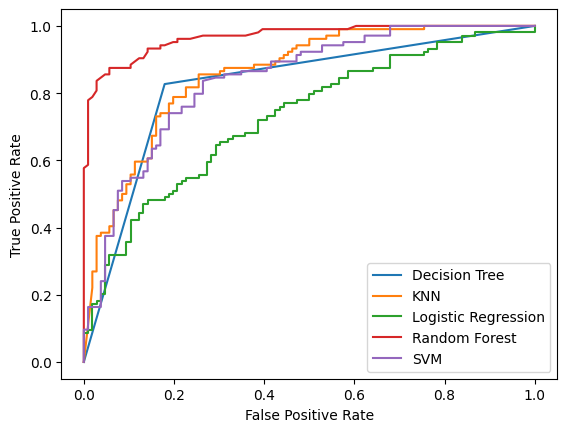

In [18]:
from matplotlib import pyplot
pyplot.plot(lr_fpr1, lr_tpr1, label='Decision Tree')
pyplot.plot(lr_fpr2, lr_tpr2, label='KNN')
pyplot.plot(lr_fpr3, lr_tpr3, label='Logistic Regression')
pyplot.plot(lr_fpr4, lr_tpr4, label='Random Forest')
pyplot.plot(lr_fpr5, lr_tpr5, label='SVM')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()